# Revealing Ferroelectric Switching Character Using Deep Recurrent Neural Networks

Joshua C. Agar<sup>1,2,3*</sup>, Brett Naul<sup>4</sup>, Shishir Pandya<sup>1</sup>, Stefan van der Walt<sup>5</sup>, Joshua Maher<sup>1</sup>, Ren Yao<sup>6</sup>, Long-Qing Chen<sup>7</sup>, Sergei V. Kalinin<sup>8</sup>, Rama K. Vasudevan<sup>8</sup>, Ye Cao<sup>6</sup>, Joshua S. Bloom<sup>4</sup>, and Lane W. Martin<sup>1,2*</sup>

<sup>1</sup> 	Department of Materials Science and Engineering, University of California, Berkeley, Berkeley, CA 94720, USA  
<sup>2</sup> 	Materials Sciences Division, Lawrence Berkeley National Laboratory, Berkeley, CA 94720, USA  
<sup>3</sup> 	Department of Materials Science and Engineering, Lehigh University, Bethlehem, PA 18015, USA  
<sup>4</sup> 	Department of Astronomy, University of California, Berkeley, Berkeley, CA 94720, USA  
<sup>5</sup>	Berkeley Institute of Data Science, University of California, Berkeley, Berkeley, CA 94720, USA  
<sup>6</sup> 	Department of Materials Science and Engineering, University Texas at Arlington, Arlington, TX 76019, USA  
<sup>7</sup> 	Department of Materials Science and Engineering and Materials Research Institute, The Pennsylvania State University, University Park, PA 16802-5006, USA  
<sup>8</sup> 	Center for Nanophase Materials Sciences, Oak Ridge National Laboratory, Oak Ridge, TN 37830, USA  
*joshua.agar@lehigh.edu, lwmartin@berkeley.edu

Keywords: ferroelectric, switching, domains, scanning-probe microscopy, neural network

# Abstract

The ability to manipulate domains underpins function in applications of ferroelectrics. While there have been demonstrations of controlled nanoscale manipulation of domain structures to drive emergent properties, such approaches lack an internal feedback loop required for automatic manipulation. Here, using a deep sequence-to-sequence autoencoder we automate the extraction of latent features of nanoscale ferroelectric switching from piezoresponse force spectroscopy of tensile-strained PbZr<sub>0.2</sub>Ti<sub>0.8</sub>O<sub>3</sub> with a hierarchical domain structure. We identify characteristic behavior in the piezoresponse and cantilever resonance hysteresis loops, which allows for the classification and quantification of nanoscale-switching mechanisms. Specifically, we identify elastic hardening events which are associated with the nucleation and growth of charged domain walls. This work demonstrates the efficacy of unsupervised neural networks in learning features of a materials physical response from nanoscale multichannel hyperspectral imagery and provides new capabilities in leveraging in operando spectroscopies that could enable the automated manipulation of nanoscale structures in materials.

# Introduction:
The ability to create and manipulate domain structures in ferroelectrics allows for the control of the phase and polarization orientation and the local and macroscale susceptibilities (e.g., electrical, thermal, mechanical, optical, etc.) thus providing a foundation for next-generation devices[1–3]. Early efforts in this regard have focused on deterministically creating desired domain structures. In, for example, tetragonal PbZr<sub>1-x</sub>Ti<sub>x</sub>O<sub>3</sub>, controlling the elastic boundary conditions has provided access to domains spanning simple monodomain to complex hierarchical domain structures[4–6]. As the field has advanced, ingenious routes, including, compositional gradients[7,8], superlattice structures[9–11], orientation control[12,13], and engineered octahedral rotations[14] have been leveraged to control domain structures.
The majority of this work, however, has focused on the static creation of desired domain structures[6,15–18] or functional domain walls[19,20], and thus lacks an internal self-regulating feedback loop required for automatic operation in functional devices. To deterministically manipulate ferroelectric domain structures requires the ability to measure while in operation (i.e., in operando) and automatically identify a number of features (e.g., polarization orientation, switching pathways, domain-wall geometry, etc.). Developments in multimodal spectroscopy now allow the acquisition of data at both the appropriate time- and length-scales required to glean such information from ferroelectric materials using techniques such as: transmission electron microscopy[21,22], scanning-probe microscopy[23,24], diffraction studies[25,26], etc[27]. The challenge, however, is that downstream analytical approaches which project data into a human-interpretable form remain underdeveloped and ill equipped for the complexity and magnitude of the data that can now be readily produced. In turn, despite the extensive amount of expensive experiments conducted, only an infinitesimally small fraction of the data collected is translated into knowledge. 
Solving this challenge, requires looking beyond the borders of nanoscience to fields such as social analytics[28,29], natural language processin[30,31], and sentiment analysis[32,33], where computational roadblocks are pervasive. For decades, standard practice was to develop machine-learning algorithms to create mathematical abstractions of the data based on characteristics of preconceived importance. Recently, the availability of massive datasets and specifically designed hardware has enabled features once designed by human experts to be extracted using brute-force computation. These representation learning tools generally rely on building architectures of simple non-linear mathematical functions which are optimized to relate the raw data to some information or label[34–36]. These so-called deep-learning-neural-network-based approaches have set new benchmarks for many common machine-learning tasks including: image[37] and speech recognition[38], language translation[39], and identification of human intention[32,33]. While these deep-learning approaches have begun to make meaningful inroads in, for example, genomics[40], high-energy physics[41], and astronomy[42], they have yet to be sufficiently embraced in experimental nanoscience[43–53]. 
Here, we develop a sequence-to-sequence neural network to extract inference from band-excitation piezoresponse spectroscopy (BEPS). To test our approach, we conducted BEPS on tensile-strained PbZr<sub>0.2</sub>Ti<sub>0.8</sub>O<sub>3</sub> thin films wherein strain drives the formation of a hierarchical *c*/*a* and *a<sub>1</sub>*/*a<sub>2</sub>* domain structure. We develop and train a deep-learning-neural-network-based sparse autoencoder on piezoresponse hysteresis loops to demonstrate parity with conventional empirical-analysis approaches. We then apply this approach to extract insight from the resonance response which has a form too complex to be properly analyzed using techniques common in experimental materials science. Using the information “learned”, we identify geometrically-driven differences in the switching mechanism which are related to charged-domain-wall nucleation and growth during ferroelastic switching. This insight could not have been extracted using machine-learning approaches that have been previously applied to materials spectroscopy and provides unprecedented information about the nature of the specific domain-structure geometries that should be explored to enhance local and macroscale susceptibilities. Furthermore, the ability to automate the extraction of inference regarding ferroelectric-switching mechanisms from multichannel nanoscale spectroscopy provides the first step (i.e., machine-learned discrimination) that could be used to design real-time control systems capable of creation and verification of interconversion of functional domain structures and interfaces. The developed approach is extensible to other forms of multi-dimensional, hyperspectral (wherein there is a spectra at each pixel) images which are commonly acquired in experiments such as time-of-flight secondary-ion mass spectrometry[54,55], scanning Raman[56], electron energy loss spectroscopy[57,58], etc. To promote the utilization of this approach, we provide open access to all data and codes in the form of a Jupyter notebook[59] (Supplementary Information). Ultimately, this work represents an example of how unsupervised deep learning can highlight features relating to ferroelectric physics overlooked by human-designed-machine-learning algorithms, and how such approaches can be adapted to analyze hyperspectral data more broadly.


## Initialization Code (code)

### Importing Packages
This code imports and installs packages that you need to run the code

In [38]:
!pip install -U moviepy keras tensorflow natsort tqdm scikit_image scikit_learn scipy
!pip install pillow==4.2.1
!pip install -U imageio==2.4.1

Requirement already up-to-date: moviepy in /usr/local/lib/python3.6/dist-packages (1.0.0)
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.5)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.14.0)
Requirement already up-to-date: natsort in /usr/local/lib/python3.6/dist-packages (6.0.0)
Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.35.0)
Requirement already up-to-date: scikit_image in /usr/local/lib/python3.6/dist-packages (0.15.0)
Requirement already up-to-date: scikit_learn in /usr/local/lib/python3.6/dist-packages (0.21.3)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.3.1)
  Using cached https://files.pythonhosted.org/packages/af/0a/943c965d372dae0b1f1482677d29030ab834351a61a9a632fd62f27f1523/imageio-2.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/41/db6dec65ddbc176a59b89485e8cc136a433ed9c6397b6bfe2cd38412

  Using cached https://files.pythonhosted.org/packages/51/c8/e7d35106199d81c9464b704762b42b3a1b9299a453c4265bfbcf28348513/Pillow-4.2.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: scikit-image 0.15.0 has requirement pillow>=4.3.0, but you'll have pillow 4.2.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 6.1.0
    Uninstalling Pillow-6.1.0:
      Successfully uninstalled Pillow-6.1.0


ERROR: scikit-image 0.15.0 has requirement pillow>=4.3.0, but you'll have pillow 4.2.1 which is incompatible.
ERROR: moviepy 1.0.0 has requirement imageio<3.0,>=2.5; python_version >= "3.4", but you'll have imageio 2.4.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.5.0
    Uninstalling imageio-2.5.0:
      Successfully uninstalled imageio-2.5.0


In [0]:
import imageio
imageio.plugins.ffmpeg.download()

### Special Codes for Collaboratory
#### Provides access to google drive
This code provides access to your google drive folder so files  can be saved

In [40]:
# if running on collaboratory set = True
collaboratory = True

if collaboratory:
    from google.colab import drive
    drive.mount('/content/drive')
else: 
    print('Running on local systems, if running on collaboratory please change above')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
cd drive/My\ Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [42]:
import os
if os.path.exists("./Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks"):
    pass
else:
    !git clone https://github.com/jagar2/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks.git

Cloning into 'Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 254 (delta 2), reused 20 (delta 1), pack-reused 230
Receiving objects: 100% (254/254), 123.38 MiB | 20.81 MiB/s, done.
Resolving deltas: 100% (125/125), done.
Checking out files: 100% (85/85), done.


In [43]:
cd Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks

/content/drive/My Drive/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [44]:
!git pull

Already up to date.


### Imports Packages
Imports packages which are used by jupyter paper

In [0]:
# imports useful packages
import warnings
warnings.filterwarnings('ignore')
import imp
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import codes.analysis.rnn as rnn
import codes.util as util
import codes.analysis.machine_learning as ml
import codes.analysis as an
import codes.processing as p
import codes.viz as viz
import codes.util.input_output as io_transfer
from sklearn.decomposition import NMF
from scipy import io
import numpy as np
import os
import os.path

# loads the custom graphing format
viz.format.custom_plt_format()

plt.style.use('seaborn-white')

### Folders
Defines a folder structure to save files

In [0]:
# builds folders where the data will be saved
folder_structure = util.file.make_folder(
    './structure')
folder_BE = util.file.make_folder(
    './Band_Excitation')
folder_BE_Movie_files = util.file.make_folder(
    folder_BE + '/BE_Movie_Files')
folder_BE_all_images = util.file.make_folder(
    folder_BE + '/BE_all_images')
folder_BE_spectra = util.file.make_folder(
    folder_BE + '/BE_spectra')
folder_BE_cleaned_spectra = util.file.make_folder(
    folder_BE + '/cleaned_spectra')
folder_pca = util.file.make_folder(
    './pca')
folder_nmf = util.file.make_folder(
    './nmf')
folder_clustering = util.file.make_folder('./clustering')
folder_pca_clustering = util.file.make_folder(
    './pca_clustering')
folder_piezoresponse_autoencoder = util.file.make_folder(
    './piezoresponse_autoencoder')
folder_resonance_autoencoder = util.file.make_folder(
    './resonance_autoencoder')
folder_piezoresponse_autoencoder_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/movie')
folder_piezoresponse_autoencoder_training_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/training_movie')
folder_resonance_autoencoder_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/movie')
folder_resonance_autoencoder_training_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/training_movie')
folder_phase_field = util.file.make_folder(
    './Phase_Field')

### Download Data
This downloads the full trained models and the phase-field simulations data. These files are >50 GB and you do not need them for most of the analysis in the Jupyter Paper

In [0]:
# Downloading data for Phase Field simulations and full training data
# note these are big files >50 gb
download_data = False

url = 'https://zenodo.org/record/1482091/files/Phase_field.zip?download=1'
filename = 'phase_field.zip'
save_path = './Raw_Data/Phase_Field/'

io_transfer.download_and_unzip(filename, url, save_path, download_data)

url = 'https://zenodo.org/record/1482091/files/Trained_models.zip?download=1'
filename = 'train_model_zip.zip'
save_path = './Trained Models/'

io_transfer.download_and_unzip(filename, url, save_path, download_data)

### Settings

#### Export Figure Settings

In [0]:
# Sets what object to export
printing = {  # exports eps vector graphics (note these files can be large)
    'EPS': True,
    # exports png files
    'PNG': True,
    # prints image series (note this can take some time)
    'all_figures': True,
    # generates movies (note this can take some time)
    'movies': True,
    # resolution of the images
    'dpi': 300}

#### Plotting Format

In [0]:
# sets the plotting format
plot_format = {
    # adds scalebar to image
    'add_scalebar': True,
    # sets the dimensions for the scalebar [(size of image),(size of scalebar)]
    'scalebar': [2000, 500],
    # selects if the image will be rotated
    'rotation': True,
    # selects the rotation angle of the image
    'angle': 60.46,
    # sets the fraction of the image to crop
    'frac_rm': 0.17765042979942694,
    # sets the resolution of the image
    'dpi': 300,
    # sets the default colormap
    'color_map': 'viridis',
    # sets if color bars should be added
    'color_bars': True}

### Loads the Data

In [0]:
# imports the raw band excitation data
imported = {'data': io.matlab.loadmat('./Raw_Data/Data.mat'),
            'validation_data': io.matlab.loadmat('Raw_Data/loop_1.mat')}

# extracts the important information from the raw data
raw = {'voltage': imported['data']['Voltagedata_mixed'],
       'piezoresponse': imported['data']['Loopdata_mixed'],
       'amplitude': imported['data']['OutA2_mixed'],
       'phase': imported['data']['OutPhi1_mixed'],
       'resonance': imported['data']['Outw2_mixed'],
       'quality_factor': imported['data']['OutQ2_mixed'],
       'val_piezoresponse': imported['validation_data']['piezo_1'],
       'val_resonance': imported['validation_data']['resonance_loop_1']}

### Cleans the Raw Data

In [0]:
# adds a max min filter on the data to remove bad points
p.filters.range_filter(raw['resonance'], [1300, 1340])
p.filters.range_filter(raw['val_resonance'], [1300, 1340])

# interpolates data that is non-real. This happens when the SHO fit fails
interpolated = {'voltage': raw['voltage'],
                'piezoresponse': p.filters.clean_interpolate(raw['piezoresponse'],
                                                             'linear').reshape(-1, raw['piezoresponse'].shape[2]),
                'amplitude': p.filters.clean_interpolate(raw['amplitude'],
                                                         'linear').reshape(-1, raw['amplitude'].shape[2]),
                'phase': p.filters.clean_interpolate(raw['phase'],
                                                     'linear').reshape(-1, raw['phase'].shape[2]),
                'resonance': p.filters.clean_interpolate(raw['resonance'],
                                                         'linear').reshape(-1, raw['resonance'].shape[2]),
                'quality_factor': p.filters.clean_interpolate(raw['quality_factor'],
                                                              'linear').reshape(-1, raw['quality_factor'].shape[2]),
                'val_piezoresponse': p.filters.clean_interpolate(raw['val_piezoresponse'],
                                                                  'linear').reshape(-1, raw['val_piezoresponse'].shape[2]),
                'val_resonance': p.filters.clean_interpolate(raw['val_resonance'],
                                                             'linear').reshape(-1, raw['val_resonance'].shape[2])}
# Uses Savitzky-Golay filter to remove outlier points
sg_filtered = {'voltage': raw['voltage'],
               'piezoresponse': p.filters.savgol(interpolated['piezoresponse'], fit_type='linear'),
               'amplitude': p.filters.savgol(interpolated['amplitude'], fit_type='linear'),
               'phase': p.filters.savgol(interpolated['phase'], fit_type='linear'),
               'resonance': p.filters.savgol(interpolated['resonance'], fit_type='linear'),
               'quality_factor': p.filters.savgol(interpolated['quality_factor'], fit_type='linear'),
               'val_piezoresponse': p.filters.savgol(interpolated['val_piezoresponse'], fit_type='linear'),
               'val_resonance': p.filters.savgol(interpolated['val_resonance'], fit_type='linear')}

# normalized the data. This is important for training Neural Networks
normalized = {'voltage': raw['voltage'],
              'piezoresponse': p.filters.normalize(sg_filtered['piezoresponse']),
              'amplitude': p.filters.normalize(sg_filtered['amplitude']),
              'phase': p.filters.normalize(sg_filtered['phase']),
              'resonance': p.filters.normalize(sg_filtered['resonance']),
              'quality_factor': p.filters.normalize(sg_filtered['quality_factor']),
              'val_piezoresponse': p.filters.normalize(sg_filtered['val_piezoresponse'],
                                                       sg_filtered['piezoresponse']),
              'val_resonance': p.filters.normalize(sg_filtered['val_resonance'],
                                                   sg_filtered['resonance'])}

# stores information which helps in making pretty axes.
signal_info = {'voltage': dict(
    symbol='voltage',
    format_str='%3.d',
    units='Voltage (V)',
    y_lim=None,
    x_tick=np.linspace(-15, 15, 7),
    pca_range=None),
    'amplitude': dict(
    symbol='A',
    format_str='%.0e',
    units='Amplitude (Arb. U.)',
    y_lim=None,
    y_tick=[],
    pca_range=None),
    'phase': dict(
    symbol='Phi',
    format_str='%3.d',
    units='Phase (${^\circ}$)',
    y_lim=[-110, 110],
    y_tick=np.linspace(-90, 90, 5),
    pca_range=None),
    'resonance': dict(
    symbol='w',
    format_str='%3.d',
    units='Resonance (kHz)',
    y_lim=[1326, 1329],
    y_tick=np.linspace(1320, 1329, 4),
    pca_range=None),
    'quality_factor': dict(
    symbol='Q',
    format_str='%3.f',
    units='Quality Factor (Arb. U.)',
    y_lim=[210, 310],
    y_tick=np.linspace(215, 310, 5),
    pca_range=None),
    'piezoresponse': dict(
    symbol='Piezoresponse',
    format_str='%.0e',
    units='Piezoresponse (Arb. U.)',
    y_lim=None,
    y_tick=[],
    pca_range=[-0.29, .29])
}

# builds a single dictonary to hold all the data
data = {'raw': raw,
        'interpolated': interpolated,
        'sg_filtered': sg_filtered,
        'normalized': normalized,
        'signal_info': signal_info}

# Results: Structural Characterization (Text)
We synthesized PbZr<sub>0.2</sub>Ti<sub>0.8</sub>O<sub>3</sub>/Ba<sub>0.5</sub>Sr<sub>0.5</sub>RuO<sub>3</sub>/ NdScO<sub>3</sub> (110) heterostructures using pulsed-laser deposition (Methods). The resulting films have a hierarchical domain structure with a sawtooth topography on two length scales (Fig. 1a-d), as the result of primarily out-of-plane polarized *c*/*a*/*c*/*a* [with enhanced out-of-plane (Fig. 1b) and suppressed in-plane (Fig. 1c) piezoresponse] and fully in-plane polarized *a<sub>1</sub>*/*a<sub>2</sub>*/*a<sub>1</sub>*/*a<sub>2</sub>* [with suppressed out-of-plane and enhanced in-plane piezoresponse] domain bands. This hierarchical domain structure emerges due to the tensile strain which drives the *c*/*a* and *a<sub>1</sub>*/*a<sub>2</sub>* domain variants to be nearly energetically degenerate (Supplementary Fig. 1)[6].
![Figure 1](https://github.com/jagar2/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/blob/master/main_text_figures/Figure_1.png?raw=1)
**Figure 1 | Surface topography of PbZr0.2Ti0.8O3 with hierarchical domain structures. a,** 3-dimensional tapping mode topography superimposed with topographic information presented in nm as indicated. **b, c,** 3-dimensional tapping mode topography superimposed with the **b,** vertical **c,** lateral piezoresponse amplitude. Color presented in arbitrary units defined by the color scale in the inset. Topographic line traces showing the surface topography across the **d,** *c*/*a*-*a<sub>1</sub>*/*a<sub>2</sub>* bands (indicated by the dark-blue-dashed line in a) and e, *c*/*a* bands (indicated by the dark-green-dashed line in a).

## Supplementary Note 1: Additional Structural Information


To support the structural studies provided in the manuscript we provide a modified temperature-strain phase diagram for PbZr<sub>0.2</sub>Ti<sub>0.8</sub>O<sub>3</sub>. Based on this diagram, at room temperature the film should exist with a monodomain *c* domain structure under large compressive strain. As the compressive strain decreases, it is energetically favorable to accommodate some in-plane oriented a domains. As the strain becomes more tensile in nature the domain structure transitions to a purely in-plane oriented *a<sub>1</sub>*/*a<sub>2</sub>* domain structure. In this work, we have grown films at $\approx$1.7% tensile strain, at this intermediate strain there is competition between *c*/*a* and *a<sub>1</sub>*/*a<sub>2</sub>* domain structures, which in turn gives rise to the hierarchical domain structure observed.
Additionally, detailed reciprocal space mapping studies were conducted about the 220- and 002-diffraction condition of the substrate and film, respectively (Supplementary Figure 1b). From these studies, we observe two sets of five peaks each. The first set of five peaks has out-of-plane lattice parameters nearly identical to what is expected for bulk PbZr<sub>0.2</sub>Ti<sub>0.8</sub>O<sub>3</sub> (~4.129 Å). There is a central peak aligned with the out-of-plane axis of the substrate (PZTc} 002), and two sets of tilted reflections (PZT<sub>c</sub>-tilt 002). The first set of tilted reflections are tilted 0.6$^\circ$ off axis, whereas, the second set of peaks are tilted by 1.2$^\circ$  relative to the [001]. The second set of five peaks has an out-of-plane lattice parameter of ~3.96 Å, nearly halfway in between the coherently strained a relaxed a domain peak position. Once again there is a central peak aligned with the substrate normal (PZTa 200), surrounded by two sets of peaks (PZTa-tilt 200) with varying tilts. The first set of reflections have a moderate tilt of ~1$^\circ$ , whereas, the second set of peaks has a more significant tilt of ~1.8$^\circ$  relative to the [001].
![Supplementary Figure 1](https://github.com/jagar2/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/blob/master/Supplementary_Materials_Figures/Figure_S1.png?raw=1)
**Supplementary Figure 1 | Additional structural studies.** **a,** Temperature-strain phase diagram for PbZr<sub>0.2</sub>Ti<sub>0.8</sub>O<sub>3</sub>. **b,** Symmetric reciprocal space map of the 400 nm thick PbZr<sub>0.2</sub>Ti<sub>0.8</sub>O<sub>3</sub>/20 nm Ba<sub>0.5</sub>Sr<sub>0.5</sub>RuO<sub>3</sub>/NdScO<sub>3</sub> (110) heterostructures. Maps obtained around the substrate 220 diffraction condition. Coherently strained and relaxed peak positions are indicated



#### Reciprical Space Maps of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with Hierarchical Domain Structures

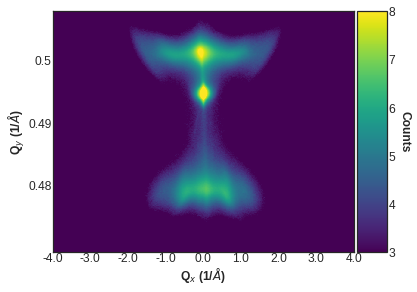

In [37]:
viz.plot.rsm(imported, printing, folder_structure, plot_format)

**Figure J2 |** Symmetric reciprocal space map of 400 nm thick PbZr${_{0.8}}$Ti${_{0.2}}$O${_{3}}$ heterostructures supported on NdScO${_3}$ (110). Map obtained around the substrate 220 diffraction condition.

#### Initial PFM images

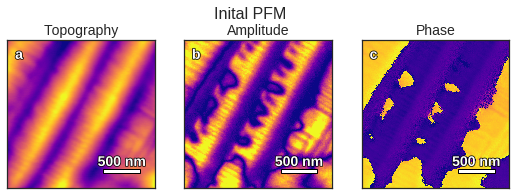

In [52]:
# (User) Sets the colorscale of [topography = (initial [-3e-9,3e-9]),
#amplitude (initial [.5e-11,6.5e-11]),
# phase (initial [40,260])]
signals = {'Topography': dict(
    c_lim=[-3e-9, 3e-9],
    data_loc='HeightOriginal'),
    'Amplitude': dict(
    c_lim=[.5e-11, 6.5e-11],
    data_loc='AmpOriginal'),
    'Phase': dict(
    c_lim=[40, 260],
    data_loc='PhaseOriginal')
}

viz.plot.pfm(signals, imported, printing, folder_structure, 'Inital PFM')

**Figure J3 | Piezoresponse force microscopy images prior to band excitation piezoresponse force microscopy switching.** **a,** topographic and **b,** vertical **c,** phase piezoresponse force microscopy images of as grown 400 nm thick PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ heterostructure supported on NdScO${_{3}}$ (110). 

#### Final PFM Images

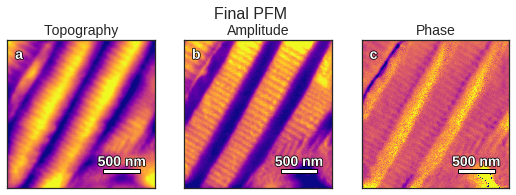

In [53]:
# (User) Sets the colorscale of [topography = (initial [-3e-9,3e-9]),
#amplitude (initial [.2e-10,1.5e-10]),
# phase (initial [50,90])]
signals = {'Topography': dict(
    c_lim=[-2e-9, 2e-9],
    data_loc='HeightFinal'),
    'Amplitude': dict(
    c_lim=[.2e-10, 1.5e-10],
    data_loc='AmpFinal'),
    'Phase': dict(
    c_lim=[50, 90],
    data_loc='PhaseFinal')
}

viz.plot.pfm(signals, imported, printing, folder_structure, 'Final PFM')

**Figure J5 | Piezoresponse force microscopy images following band excitation piezoresponse force microscopy switching.** **a,** topographic and **b,** vertical **c,** phase piezoresponse force microscopy images of as grown 400 nm thick PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ heterostructure supported on NdScO${_{3}}$ (110). 

# Results: Band Excitation Piezoresponse Force Microscopy Text

To characterize the nanoscale switching processes, we conducted BEPS (Methods and Supplementary Figs. 2 and 3). Briefly, BEPS measures the piezoresponse in remanence (across a band of frequencies near the cantilever resonance) following a perturbation from a bipolar triangular switching waveform designed to fully switch the material. Following fitting, the raw data from this experiment at every pixel (x,y size = 60, 60) measures the amplitude (*A*), phase ($\phi$), resonance frequency ($\omega$), and quality factor (*Q*) of the cantilever resonance, which are qualitative measures of the piezoresponse, polarization direction, stiffness, and dampening, respectively, at various voltages (V length = 96). At the most basic level, visualization of the switching processes can be achieved by creating movies from the images of the signals throughout the switching process or by plotting the response curves at a specific location or within a predefined area (Supplementary Movie 1). Additionally, it is common to compute at each tip position a piezoresponse loop ($A\cos{\phi}$) which can then be fit to a 15-parameter empirical function. While such approaches are capable of visualizing large differences in the piezoresponse they provide only limited information into subtle differences of the response, which contains important insight (Supplementary Information Fig. 4). While in the raw form the data might occupy a N-dimensional space the information of physical significance lies on a data manifold with a much lower dimensionality, however, we have no means to predict the manifold.

## Supplementary Note 2: Band Excitation Piezoresponse Force Microscopy
Traditional approaches to scanning probe microscopy and, in particular PFM, tend to rely on periodically exciting a cantilever using a single-frequency excitation at, or very near to, the cantilever resonance to perturb the sample, invoking a response in the cantilever amplified by its resonance. In single-frequency excitation, the response of the cantilever, and ultimately the signal of interest, is measured using a lock-in amplifier1. While powerful for imaging highly-responsive materials with large domain features, the limitations of a single-frequency approach become obvious even when considering a simple idealized model of the cantilever resonance in the form of a simple harmonic oscillator (SHO). In this case, the response of the cantilever is primarily determined by the resonance frequency (defined by the tip-surface spring constant), amplitude (a measure of the response), and quality factor of cantilever resonance (i.e., tip-surface dissipation), all of which are convoluted by the tip-surface interaction[2]. While more advanced approaches based on phase-locked loops (which use external circuitry to try to maintain the system at resonance) or dual-frequency resonance tracking (which excites, measures, and then tracks the resonance using two frequencies) provides a more accurate measure of piezoresponse, they still only provide minor improvements applicable under the strictest set of assumptions[3].
To overcome these bandwidth limitations and accurately measure piezoresponse without artifacts imposed by changing cantilever dynamics it is crucial to measure the cantilever response over a large bandwidth near the cantilever resonance (Supplementary Figure 2a). To do this, we used band-excitation piezoresponse force microscopy (BE-PFM), which uses a computer-generated waveform (Supplementary Figure 2b) spanning band of frequencies near the measured cantilever resonance to electrically perturb the material (Supplementary Figure 2c)[2]. The response of the cantilever can then be measured with a high-speed data acquisition system and subsequently Fourier transformed (Supplementary Figure 2d) into the frequency domain. Following data collection, assuming that the tip-sample interaction is weak, the amplitude and phase can be fit to a SHO model as described in equations 1-2, where *A<sub>0</sub>* and $\omega_0$ are the amplitude and frequency at resonance.

$$
\begin{equation}
A(\omega)=\frac{A_{0}\omega^2_0}{\sqrt{(\omega^2-\omega^2_0)^2+(\omega\omega_0/Q)^2}}
\tag{1}
\end{equation}
$$

$$
\begin{equation}
\tan{(\theta(\omega))}=\frac{\omega\omega_0/Q}{\omega^2-\omega_0^2}
\tag{2}
\end{equation}
$$

Following fitting (Supplementary Figure 2d), the error of the fits can be evaluated (i.e., the quality of the deconvolution), and if good, the data yields (x,y) maps of resonance amplitude (*A<sub>0</sub>*), resonance frequency ($\omega_0$), and quality factor (*Q*) as well as the phase ($\theta$) of the response. Therefore, with the proper care, the application of BE-PFM enables the exclusion of cross-talk (associated with position dependent changes in the cantilever resonance) minimizing the contribution from the tip-surface interaction.

Building off the BE-based imaging technique, it is possible to add additional dimensionality to such measurements, providing deeper insight into the response of the material. Specifically, instead of just measuring $\{A,\theta\}(x,y,\omega)$ we can add an additional dc-voltage dimensionality to the measurement [that is, $\{A,\theta\}(x,y,\omega, V_{dc})$] enabling the measurement of local piezoelectric hysteresis loops while taking advantage of the enhanced measurement precision provided by band excitation. To do this, we superimposed a *n* x *n* grid, on a previously scanned region of interest (Supplementary Figure 3a). At each point, a full bipolar triangular switching waveform is applied to the cantilever (Supplementary Figure 3b-d) and readout is conducted in the off-state (that is, remanent state) by superimposing a band-excitation waveform (sense pulse). This process happens rapidly (total elapsed time <5 ms). Following data acquisition, the data is fit using a SHO model as previously described (Supplementary Figure 3e), yielding data of the form $\{A_0, \omega_0, Q, \theta_0\}(x, y, V_dc)$. By optimizing the rotation angle ($\phi$) to maximize the real component of the hysteresis loop mixed-signal ($A_0\cos{\phi}) it is possible to generate local piezoelectric hysteresis loops of the same general form as typical macroscopic ferroelectric hysteresis loops (Supplementary Figure 3f).

It is worth emphasizing that all units are intentionally reported in arbitrary units. To measure the deflection of the cantilever it is standard practice to use the beam bounce approach. In this approach, a laser is reflected off the back of the cantilever and the angular displacement, not the vertical displacement, is measured by a quadrant photodiode. To accurately convert the angular dependence into a displacement requires a number of assumptions to be made about the cantilever mode shape. While these assumptions are fairly accurate in air, they deviate from ideality when the cantilever is in contact with the surface. In turn, the measured effective piezoresponse using 

the beam bounce approach can easily vary by orders of magnitude depending on the laser spot position and contact resonance frequency4. Such values of piezoresponse commonly reported in literature generally do not include consideration for these effects (unless specifically mentioned) and thus should be considered as being reported in arbitrary units.

## Visualize Cleaned Data

In [0]:
# Selects a random index to plot
#i = np.random.randint(3600)
# if user wants to show a specific point
i = 100

# Plots the raws data (black) and cleaned data (red)
viz.plot.cleaned_data(data, i, printing, folder_BE_cleaned_spectra)

**Figure J1 | Images showing preprocessing of data. a,** Piezoresponse **b,** amplitude **c,** phase **d,** resonance frequency **e,** quality factor. Raw data is shown in black, processed data shown in red.

###  Topography and Piezoresponse

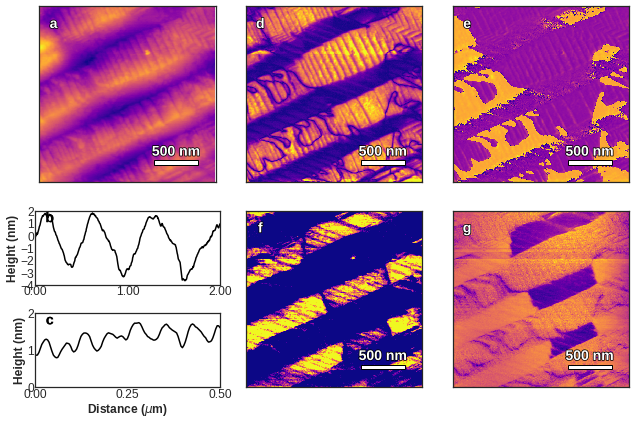

In [51]:
# Description and properties of the plots
signals = {'Topography': dict(
    c_lim=[],
    data_loc='topo_mixed'),
    'Large-Periodicity Line Trace': dict(
    data_loc='topo_ca_caca_mixed',
    x_lim=[0, 2],
    y_lim=[-4, 2],
    shift=0),
    'Small-Periodicity Line Trace':  dict(
    data_loc='topo_mixed_caca',
    x_lim=[0, .5],
    y_lim=[0, 2],
    shift=0.8),
    'Vertical Amplitude': dict(
    c_lim=[0, 4.5e-10],
    data_loc='Vert_Amp_mixed'),
    'Vertical Phase': dict(
    c_lim=[],
    data_loc='vert_phase_mixed'),
    'Lateral Amplitude': dict(
    c_lim=[0, .8e-11],
    data_loc='lateral_amp_mixed'),
    'Lateral Phase': dict(
    c_lim=[],
    data_loc='lateral_phase_mixed')
}

# plots the PFM images and line traces across those images.
viz.plot.pfm_w_line_trace(signals, imported, printing, folder_structure)

**Figure J1 | Piezoresponse force microscopy images of 400 nm thick PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ heterostructures supported on NdScO${_3}$ (110). a,** Topography **b,** Line trace indicating the large scale sawtooth-like topography between the *c/*a/*c/*a and *a${_1}$/*a${_2}$/*a${_1}$/*a${_2}$ domain regions. **c,** Line trace indicating the small scale sawtooth-like topography within the c/a/c/a domain bands. Images of piezoresponse vertical **d,** amplitude and **e,** phase and lateral **f,** amplitude and **g,** phase.

# Band Excitation Piezoresponse Force Microscopy - Basic Analysis

## Exports all images

In [0]:
# Checks if user selected to export all figures
if printing['all_figures']:

    # (User) Sets the colorscale {Initial Amplitude = [0.0020e-3, 0.1490e-3]; Phase = [-265,-30];
    #                                     Resonance = [1317,1330]; Quality Factor = [175,270]}
    signal_clim = {('Amplitude', 'A'): [0.0020e-3, 0.1490e-3],
                   ('Phase', 'Phi'): [-265, -30],
                   ('Resonance', 'w'): [1317, 1330],
                   ('Quality Factor', 'Q'): [175, 270],
                   }

    # prints all images from the switching studies
    viz.plot.band_excitation(imported['data'], signal_clim, plot_format, printing,
                             folder_=folder_BE_all_images)

## Export Images for Movie

In [0]:
if printing['movies']:
    # (User) Sets the colorscale {Initial Amplitude = [0.0020e-3, 0.1490e-3]; Phase = [-265,-30];
    #                                     Resonance = [1317,1330]; Quality Factor = [175,270]}
    signal_clim = {('Amplitude', 'A', '%.0e'): [0.0020e-3, 0.1490e-3],
                   ('Phase', 'Phi', '%.0d'): [-265, -30],
                   ('Resonance', 'w', '%.0d'): [1317, 1330],
                   ('Quality Factor', 'Q', '%.0d'): [175, 270],
                   }

    # creates the images used to make the movie of the switching studies
    viz.plot.band_excitation_movie(imported, signal_clim, 
                                    plot_format, printing, folder = folder_BE_Movie_files)

In [0]:
# creates the movie of the switching studies
if printing['movies']:
    util.file.make_movie('BE_Switching', folder_BE_Movie_files, folder_BE, 'png',
                         4, output_format='mp4')

## Plot Raw Band Excitation Spectra

In [0]:
# (User) selects index (index used in main manuscript as example [30,30], cycle 2)
x = 30
y = 30
cycle = 2

# Sets the information for plotting. (User) can adjust scales.
signal_clim = {'Amplitude': dict(
    symbol='A',
    format_str='%.0e',
    units='(Arb. U.)',
    y_lim=[],
    y_tick=[]),
    'Phase': dict(
    symbol='Phi',
    format_str='%3.d',
    units='(${^\circ}$)',
    y_lim=[-110, 110],
    y_tick=np.linspace(-90, 90, 5)),
    'Resonance': dict(
    symbol='w',
    format_str='%3.d',
    units='(kHz)',
    y_lim=[1326, 1329],
    y_tick=np.linspace(1320, 1329, 4)),
    'Quality Factor': dict(
    symbol='Q',
    format_str='%3.f',
    units='',
    y_lim=[210, 310],
    y_tick=np.linspace(215, 310, 5)),
    'Piezoresponse': dict(
    symbol='Piezoresponse',
    format_str='%.0e',
    units='(Arb. U.)',
    y_lim=[],
    y_tick=[])
}

# plots the raw BE spectra
viz.plot.band_excitation_spectra(x, y, cycle, imported['data'],
                                 signal_clim, printing, folder_BE_spectra)

**Figure J6 |** Example raw piezoresponse loops acquired during band excitation piezoresponse spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures. Showing **a,** amplitude, **b,** phase, **c,** resonance, **d,** quality factor, and **e,** piezoresponse (Acos${\phi}$) loop.

## Loop Fitting Results

In [0]:
# Sets the information for plotting. (User) can adjust scales.
signal_clim = {'a1': dict(
    label='a${_1}$',
    data_loc='a1_mixed',
    format_str='%.1e',
    c_lim=[-1.5e-4, 0]),
    'a2': dict(
    label='a${_2}$',
    data_loc='a2_mixed',
    format_str='%.1e',
    c_lim=[0, 1.5e-4]),
    'a3': dict(
    label='a${_3}$',
    data_loc='a3_mixed',
    format_str='%.1e',
    c_lim=[-1e-6, 3e-6]),
    'b1': dict(
    label='b${_1}$',
    data_loc='b1_mixed',
    format_str='%.1f',
    c_lim=[0, 10]),
    'b2': dict(
    label='b${_2}$',
    data_loc='b2_mixed',
    format_str='%.1f',
    c_lim=[0, 50]),
    'b3': dict(
    label='b${_3}$',
    data_loc='b3_mixed',
    format_str='%.1f',
    c_lim=[0, 12]),
    'b4': dict(
    label='b${_4}$',
    data_loc='b4_mixed',
    format_str='%.1f',
    c_lim=[0, 25]),
    'b5': dict(
    label='b${_5}$',
    data_loc='b5_mixed',
    format_str='%.1f',
    c_lim=[0, 12]),
    'b6': dict(
    label='b${_6}$',
    data_loc='b6_mixed',
    format_str='%.1f',
    c_lim=[0, 12]),
    'b7': dict(
    label='b${_7}$',
    data_loc='b7_mixed',
    format_str='%.1f',
    c_lim=[-15, 15]),
    'b8': dict(
    label='b${_8}$',
    data_loc='b8_mixed',
    format_str='%.1f',
    c_lim=[-15, 15]),
    'Loop Area': dict(
    label='Raw Area',
    data_loc='Acosarea_mixed',
    format_str='%.1e',
    c_lim=[5e-4, 4e-3]),
    'Fitted Loop Area': dict(
    label='Fitted Area',
    data_loc='Acosareafit_mixed',
    format_str='%.1e',
    c_lim=[5e-4, 4e-3]),
    'Raw/Fitted Loop Difference': dict(
    label='Raw/Fitted Diff.',
    data_loc='Acosareadif_mixed',
    format_str='%.1e',
    c_lim=[0, 1.5]),
    'Raw Amplitude Centroid': dict(
    label='Raw Amp. Cent.',
    data_loc='AcoscentAc_mixed',
    format_str='%.1e',
    c_lim=[-2e-5, 2e-5]),
    'Fitted Amplitude Centroid': dict(
    label='Fitted Amp. Cent.',
    data_loc='AcoscentAcfit_mixed',
    format_str='%.1e',
    c_lim=[-2e-5, 2e-5]),
    'Raw Voltage Centroid': dict(
    label='Raw Volt. Cent.',
    data_loc='AcoscentV_mixed',
    format_str='%.1f',
    c_lim=[-1, 4]),
    'Fitted Voltage Centroid': dict(
    label='Fitted Volt. Cent.',
    data_loc='AcoscentVfit_mixed',
    format_str='%.1f',
    c_lim=[-1, 4]),
    'Loop Height': dict(
    label='Height',
    data_loc='Acosheight_mixed',
    format_str='%.1e',
    c_lim=[5e-5, 2.5e-4]),
    'Loop Width': dict(
    label='Width',
    data_loc='Acoswidth_mixed',
    format_str='%.1f',
    c_lim=[12, 18]),
    'Left Coercive field': dict(
    label='Left E${_c}$',
    data_loc='Al_mixed',
    format_str='%.1f',
    c_lim=[4, 11]),
    'Right Coercive field': dict(
    label='Right E${_c}$',
    data_loc='Au_mixed',
    format_str='%.1f',
    c_lim=[4, 11]),
    'Negative Nucleation Bias': dict(
    label='Neg. Nuc. Bias',
    data_loc='Acosnegnuc_mixed',
    format_str='%.1f',
    c_lim=[0, 6]),
    'Positive Nucleation Bias': dict(
    label='Pos. Nuc. Bias',
    data_loc='Acosposnuc_mixed',
    format_str='%.1f',
    c_lim=[0, 6]),
    'Loop Twist': dict(
    label='Twist',
    data_loc='Acostwist_mixed',
    format_str='%.1e',
    c_lim=[0, 2.5e-2]),
    'Optimum Rotation Angle': dict(
    label='Opt. Rot. Angle',
    data_loc='optrotang_mixed',
    format_str='%.1f',
    c_lim=[235, 240]),
    'Normalized Amplitude Centroid': dict(
    label='Norm. Amp. Cent.',
    data_loc='NormAcCent_mixed',
    format_str='%.1f',
    c_lim=[-15, 15]),
    'Normalized Voltage Centroid': dict(
    label='Norm. Volt. Cent.',
    data_loc='NormVCent_mixed',
    format_str='%.1f',
    c_lim=[-10, 30])}

viz.plot.loopfits(imported['data'], signal_clim,
                  printing, folder_BE, plot_format)

**Figure J7 |  Spatial maps of loop fitting parameters obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures. a,** a${_1}$ - represents the lowest piezoresponse amplitude. **b,** a${_2}$ - represents the highest piezoresponse value. **c,** a${_3}$ - Loop rotation as defined by tan${\delta}$. **d-g,** b${_{1-4}}$ - parameters specifying the curvature of the loop transitions. **h-i,** b${_{5-6}}$ - parameter specifying the rate of transitions between the curvatures of the loop. **j-k,** b${_{7-8}}$ - parameter specifying the voltage midpoint of the transitions. **l-m,** Raw (fitted) loop area the area enclosed by the raw (fitted) loop, representative of the work of switching. **n,** Area differential, the absolute difference between the area enclosed by the raw and fitted loop. **o-p,**  Raw (fitted) amplitude centroid the center of mass of the amplitude of the raw (fitted) piezoresponse loop. **q-r,**  Raw (fitted) voltage centroid the center of mass of the raw (fitted) piezoresponse loop. **s,** Loop height the vertical height in amplitude of the piezoelectric hysteresis loop. **t,** Loop width in volts. **u-v,** Left/Right E${_c}$ negative/positive piezoelectric coercive fields. **w-x,** Negative/positive nucleation bias, representing the voltage where the piezoresponse has changed by 3% of the loop height. **y,** Loop twist, the twists in shape of the piezoelectric hysteresis loops. **z,** Optimum rotation angle, the optimum ${\phi}$ found which maximizes Acos${\phi}$. **aa-ab,** Loop height (width) normalized amplitude (voltage) centroids. 

# Classical Machine Learning Approaches

## Principal Component Analysis

### Piezoresponse

In [0]:
# creates a dictionary to store the machine learning results
machine_learning = {'pca': dict(),
                    'nmf': dict(),
                    'clustering': dict(),
                    'pca_clustering': dict()}

In [0]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['piezoresponse'], _ = ml.pca(
    sg_filtered['piezoresponse'], 16)

# Plots the PCA results
viz.plot.pca_results(machine_learning['pca']['piezoresponse'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'piezoresponse', filename='piezoresponse')

**Figure J9 |  Principal component analysis the piezoresponse obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Amplitude

In [0]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['amplitude'], _ = ml.pca(sg_filtered['amplitude'], 16)

# plots the pca results
viz.plot.pca_results(machine_learning['pca']['amplitude'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'amplitude', filename='amplitude')

**Figure J10 |  Principal component analysis the amplitude obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Phase

In [0]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['phase'], _ = ml.pca(sg_filtered['phase'], 16)

# plots the pca results
viz.plot.pca_results(machine_learning['pca']['phase'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'phase', filename='phase')

**Figure J11 |  Principal component analysis the phase obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Resonance Frequency

In [0]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['resonance'], _ = ml.pca(sg_filtered['resonance'], 16)

# plots the pca results
viz.plot.pca_results(machine_learning['pca']['resonance'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'resonance', filename='resonance')

**Figure J12 |  Principal component analysis the resonance frequency obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Quality Factor

In [0]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['quality_factor'], _ = ml.pca(
    sg_filtered['quality_factor'], 16)

# plots the pca results
viz.plot.pca_results(machine_learning['pca']['quality_factor'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'quality_factor', filename='quality_factor')

**Figure J13 |  Principal component analysis the quality factor obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

## Non-Negative Matrix Factorization

### Piezoresponse

In [0]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['piezoresponse'] = ml.nmf(
    model, data['sg_filtered']['piezoresponse'])

# plots the nmf results
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['piezoresponse'],
             printing,
             plot_format,
             signal_info['piezoresponse'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J14 |  Non-negative matrix factorization of the piezoresponse obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Amplitude

In [0]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['amplitude'] = ml.nmf(
    model, data['sg_filtered']['amplitude'])

# plots the nmf results
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['amplitude'],
             printing,
             plot_format,
             signal_info['amplitude'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J15 |  Non-negative matrix factorization of the amplitude obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Phase

In [0]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['phase'] = ml.nmf(model, data['sg_filtered']['phase'])

# plots the nmf results
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['phase'],
             printing,
             plot_format,
             signal_info['phase'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J16 |  Non-negative matrix factorization of the phase obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Resonance Frequency

In [0]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['resonance'] = ml.nmf(
    model, data['sg_filtered']['resonance'])

# plots the nmf
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['resonance'],
             printing,
             plot_format,
             signal_info['resonance'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J17 |  Non-negative matrix factorization of the resonance frequency obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Quality Factor

In [0]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['quality_factor'] = ml.nmf(
    model, data['sg_filtered']['quality_factor'])

# plots the nmf
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['quality_factor'],
             printing,
             plot_format,
             signal_info['quality_factor'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J18 |  Non-negative matrix factorization of the quality factor obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

## Clustering

In [0]:
# Sets the number of clusters in the divisive clustering
clustering = {'initial_clusters': 2,
              'c_clusters': 5,
              'a_clusters': 4}

# Sets the names of the maps
names = {('c/a-a${_1}$/a${_2}$', 'cluster_ca'),
         ('a${_1}$/a${_2}$', 'a_map'),
         ('c/a', 'c_map')}

### Piezoresponse

In [0]:
# clusters the piezoresponse curves
machine_learning['clustering']['piezoresponse'] = ml.k_means_clustering(
    data, 'piezoresponse',
    clustering, seed=42)

# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['piezoresponse'],
                                names,
                                plot_format)

**Figure J19 | Divisive clustering of the piezoresponse curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# sets the y range for the plots
signal_info['piezoresponse']['y_lim'] = [-1.5e-4, 1.5e-4]

# plots the cluster maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['piezoresponse'],
                              plot_format,
                              signal_info,
                              'piezoresponse',
                              printing,
                              folder_clustering)

**Figure J20 | Divisive clustering of the piezoresponse curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Amplitude

In [0]:
# clusters the amplitude curves
machine_learning['clustering']['amplitude'] = ml.k_means_clustering(
    data, 'amplitude',
    clustering, seed=42)

# plots the amplitude clustering maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['amplitude'],
                                names, plot_format)

**Figure J21 | Divisive clustering of the amplitude curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# plots the clustering map and average hysteresis loop
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['amplitude'],
                              plot_format,
                              signal_info,
                              'amplitude',
                              printing,
                              folder_clustering)

**Figure J22 | Divisive clustering of the amplitude curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Phase

In [0]:
# clusters the phase loops
machine_learning['clustering']['phase'] = ml.k_means_clustering(
    data, 'phase',
    clustering, seed=42)

# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['phase'],
                                names, plot_format)

**Figure J23 | Divisive clustering of the phase curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# plots the clustering map and average hysteresis loop
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['phase'],
                              plot_format,
                              signal_info,
                              'phase',
                              printing,
                              folder_clustering)

### Resonance Frequency

In [0]:
# clusters the resonance frequency
machine_learning['clustering']['resonance'] = ml.k_means_clustering(
    data, 'resonance',
    clustering, seed=42)

# plots the resonance frequency maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['resonance'],
                                names, plot_format)

**Figure J24 | Divisive clustering of the resonance frequency curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# plots the clusters with average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['resonance'],
                              plot_format,
                              signal_info,
                              'resonance',
                              printing,
                              folder_clustering)

**Figure J25 | Divisive clustering of the resonance frequency curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Quality Factor

In [0]:
# clusters the quality factor curves
machine_learning['clustering']['quality_factor'] = ml.k_means_clustering(
    data, 'quality_factor',
    clustering, seed=42)

# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['quality_factor'],
                                names, plot_format)

**Figure J26 | Divisive clustering of the quality factor curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# plots the cluster maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['quality_factor'],
                              plot_format,
                              signal_info,
                              'quality_factor',
                              printing,
                              folder_clustering)

**Figure J27 | Divisive clustering of the quality factor curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

## PCA + Clustering

### Piezoresponse

In [0]:
signal = 'piezoresponse'

# computes the PCA
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])

# clusters the PCA results
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)

# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J28 | Divisive clustering of the first 16 principal components of the piezoresponse curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# plots the clustering results and average hysteresis curves
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J29 | Divisive clustering of the first 16 principal components of the piezoresponse curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Amplitude

In [0]:
signal = 'amplitude'

# computes the pca
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])
# clusters the loops
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)

# plots the clustering maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J30 | Divisive clustering of the first 16 principal components of the amplitude curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# plots the clustering maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J31 | Divisive clustering of the first 16 principal components of the amplitude curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Phase

In [0]:
signal = 'phase'

# computes the pca
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])
# clusters the pca
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)
# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J32 | Divisive clustering of the first 16 principal components of the phase curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# plots the clustering maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J33 | Divisive clustering of the first 16 principal components of the phase curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Resonance

In [0]:
signal = 'resonance'

# computes the pca
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])
# clusters the results
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)
# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J34 | Divisive clustering of the first 16 principal components of the resonance frequency curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# plots the clustering maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J35 | Divisive clustering of the first 16 principal components of the resonance frequency curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Quality Factor

In [0]:
signal = 'quality_factor'

# computes the pca
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])
# computes the cluster maps
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)
# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J36 | Divisive clustering of the first 16 principal components of the quality factor curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

In [0]:
# plots the clustering maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J37 | Divisive clustering of the first 16 principal components of the quality factor curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

# Deep Learning Long Short-Term Memory Reccurent Neural Network Autoencoder

## Piezoresponse

### Building the model

In [0]:
# selects the folder where the pre-trained models are located
model_folder = './Trained Models/Piezoresponse/Bidirect_lstm_size064_enc4_emb16_dec4_lr3m05_drop0.2_l1norm_1m05_batchnorm_TT_001'

# Function to build the model
piezoresponse_model, run_id = rnn.rnn('lstm', 64, 4, 4, 16,
                                      data['sg_filtered']['piezoresponse'].shape[1],
                                      lr=3e-5, drop_frac=.2, l1_norm=1e-4,
                                      batch_norm=[True, True])

### Train the model

In [0]:
# select if the user will train a new model.
# Note training requires GPU access and can take a long time (1-2 days)
train_model = False

if train_model:
    # trains the model saving results as checkpoints
    rnn.train_model(run_id, piezoresponse_model,
                    data['normalized']['piezoresponse'],
                    data['normalized']['val_piezoresponse'],
                    folder_piezoresponse_autoencoder)

### Loads Pre-Trained Model

In [0]:
# loading the pre-trained weights
piezoresponse_model.load_weights(model_folder + '/weights.15179-0.00.hdf5')

# Updates the decoder based on decoding optimization.
# this was done to improve the quality of the reconstruction.
piezoresponse_model, piezoresponse_decoder = rnn.update_decoder(piezoresponse_model,
                                                                './Trained Models/Piezoresponse/weights.00033723-0.0022.hdf5')

In [0]:
# Displays the model summary
piezoresponse_model.summary()

## Model Validation

### Validation Loss

In [0]:
# loss for the training data
print('Training Data Set:')
score = piezoresponse_model.evaluate(np.atleast_3d(data['normalized']['piezoresponse']),
                                     np.atleast_3d(data['normalized']['piezoresponse']))
print('Test loss:', score)

# loss for the validation data
print('Validation Data Set:')
score = piezoresponse_model.evaluate(np.atleast_3d(data['normalized']['val_piezoresponse']),
                                     np.atleast_3d(data['normalized']['val_piezoresponse']))
print('Validation loss:', score)

### Training Results

In [0]:
# plots the loss and an example reconstruction
# set to plot a random loop
# to plots a specific point add i=(pixel position)
viz.plot.training_loss(model_folder,
                       data,
                       piezoresponse_model,
                       'piezoresponse',
                       signal_info,
                       printing, folder_piezoresponse_autoencoder)

**Figure J38 | Piezoresponse autoencoder traiing results. a,** Training loss (training - black) validation (red). Example hysteresis loop from the **b,** training, **c,** validation data set. Black curve shows the original measured data, red curve show the autoencoder reconstruction.    

### Low Dimensional Layer

In [0]:
# Computes the low dimensional layer
piezoresponse_embeddings = rnn.get_activations(piezoresponse_model,
                                               data['normalized']['piezoresponse'],
                                               9)

In [0]:
# defines the ranges for the images
ranges = [0, 1.3e-2, 0, 0, 0,
          0, 0, 6e-3, 0, 0,
          0, 1.3e-2, 1e-2, 0, 0, 3e-3]

# plots the embedding maps
_ = viz.plot.embedding_maps(piezoresponse_embeddings,
                            printing,
                            plot_format,
                            folder_piezoresponse_autoencoder,
                            filename='./Piezoresponse_embeddings',
                            ranges=ranges)

**Figure J39 | Output of low dimensional layer obtained from the piezoreponse autoencoder.**

### Plot Embedding and Line Trace

In [0]:
# rotates and crops the topography image
crop_topo, scale = util.core.rotate_and_crop(
    np.flipud(imported['data']['HeightFinal'].reshape(1024, 1024).T))

# creates the figures and axes in a pretty way
num_img = 10
fig, ax = viz.format.layout_fig(num_img,
                                mod=num_img // 2)

# plots the selected embeddings superimposed on the line trace
for i, v in enumerate([1, 7, 11, 12, 15]):

    viz.plot.embedding_line_trace(ax,
                                  i,
                                  crop_topo,
                                  piezoresponse_embeddings[:, v],
                                  [0, ranges[v]],
                                  plot_format,
                                  number=num_img // 2)

plt.tight_layout(pad=1)

# saves the figure
util.file.savefig(folder_piezoresponse_autoencoder +
                  '/embedding_and_topography', printing)

**Figure J40 | Plots of selected embedding maps from piezoelectric autoencoder superimposed on average topography.**

### Exports Training Images

Exports low dimensional layer computed after each epoch (with improvement) during training. This allows the visualization of the effect of L${_1}$ regularization.

In [0]:
# selects to export training images
# note this take a long time (1-2 hours)
export_training_images = False

if export_training_images:
    if np.int(io_transfer.get_size(model_folder) / 1e8) > 1:
        # exports all low dimensional layers from training
        viz.plot.training_images(piezoresponse_model,
                                 data,
                                 model_folder,
                                 printing,
                                 plot_format,
                                 folder_piezoresponse_autoencoder_training_movie)
        if printing['movies']:
            # Script to making movie
            util.file.make_movie('Piezoresponse_training_movie',
                                 folder_piezoresponse_autoencoder_training_movie,
                                 './',
                                 'png',
                                 10,
                                 output_format='mp4')

### Make Generator Movie

Makes a movie where the magnitude of the embedding is manipulated and the decoder is used to generate the piezoresponse

In [0]:
if printing['movies']:

    # defines the ranges for the embeddings
    ranges = [1.3e-2, 6e-3, 1.3e-2, 1e-2, 3e-3]

    # generates images for the generator movie
    _ = viz.plot.generator_movie(piezoresponse_decoder, piezoresponse_embeddings,
                                 data['raw']['voltage'], 100, 500,
                                 ranges, folder_piezoresponse_autoencoder_movie,
                                 plot_format, printing,
                                 graph_layout=[5, 5])

    # Script to making movie
    util.file.make_movie('Piezoresponse_Generator_movie', folder_piezoresponse_autoencoder_movie,
                         './', 'png', 10, output_format='mp4', reverse=True)

### Plots Generator Results

In [0]:
# defines the range for the embeddings
ranges = [1.3e-2, 6e-3, 1.3e-2, 1e-2, 3e-3]

# plots the embedding layer and the generated results
viz.plot.generator_piezoresponse(piezoresponse_decoder,
                                 piezoresponse_embeddings,
                                 data['raw']['voltage'],
                                 ranges,
                                 6,
                                 100,
                                 printing,
                                 plot_format,
                                 folder_piezoresponse_autoencoder)

**Figure J41 | Plots of selected embedding maps from piezoelectric autoencoder bottom shows generated hysteresis loop obtained when varying each embedding.** The color of the piezoelectric hysteresis loop reflects the colors in the map

## Resonance

### Building the model

In [0]:
# selects the folder where the pre-trained model is saved
model_folder = './Trained Models/Resonance/Bidirect_lstm_size064_enc4_emb16_dec4_lr3m05_drop0.2_l1norm_0.0001_batchnorm_TT_001'

# Function to build the model
resonance_model, run_id = rnn.rnn(
    'lstm',
    64,
    4,
    4,
    16,
    data['sg_filtered']['resonance'].shape[1],
    lr=3e-5,
    drop_frac=.2,
    l1_norm=1e-4,
    batch_norm=[True, True])

### Train the model

In [0]:
# select if the user will train a new model.
# Note training requires GPU access and can take a long time (1-2 days)
train_model = False

if train_model:
    # trains the model saving each epoch (with improvement) as a checkpoint
    rnn.train_model(
        run_id,
        resonance_model,
        data['normalized']['resonance'],
        data['normalized']['val_resonance'],
        folder_resonance_autoencoder)

### Loads Pre-Trained Model

In [0]:
# loading the pre-trained weights
resonance_model.load_weights(model_folder + '/weights.00022570-0.0123.hdf5')

# loads the pre-trained weight from an optimized decoder
# training of the decoder was done to minimize reconstruction error
resonance_model, resonance_decoder = rnn.update_decoder(
    resonance_model,
    './Trained Models/Resonance/weights.00013412-0.0106.hdf5')

In [0]:
# Displays the model summary
resonance_model.summary()

## Model Validation

### Validation Loss

In [0]:
# computes the training loss
print('Training Data Set:')
score = resonance_model.evaluate(np.atleast_3d(data['normalized']['resonance']),
                                 np.atleast_3d(data['normalized']['resonance']))
print('Test loss:', score)

# computes the validation loss
print('Validation Data Set:')
score = resonance_model.evaluate(np.atleast_3d(data['normalized']['val_resonance']),
                                 np.atleast_3d(data['normalized']['val_resonance']))
print('Validation loss:', score)

In [0]:
# plots the loss and an example reconstruction
# set to plot a random loop
# to plots a specific point add i=(pixel position)
viz.plot.training_loss(
    model_folder,
    data,
    resonance_model,
    'resonance',
    signal_info,
    printing,
    folder_resonance_autoencoder)

**Figure J43 | Resonance autoencoder traiing results. a,** Training loss (training - black) validation (red). Example hysteresis loop from the **b,** training, **c,** validation data set. Black curve shows the original measured data, red curve show the autoencoder reconstruction.  

In [0]:
# Computes the low dimensional layer
resonance_embeddings = rnn.get_activations(
    resonance_model,
    data['normalized']['resonance'],
    9)

In [0]:
# defines the ranges for the images
ranges = [0, 0, 0, 0, 6e-3,
          0, 4e-2, 0, 6e-2, 1e-1,
          0, 1e-3, 0, 0, 0, 1.6e-2]

# plots the embedding maps
_ = viz.plot.embedding_maps(
    resonance_embeddings,
    printing,
    plot_format,
    folder_resonance_autoencoder,
    filename='./Resonance_embeddings',
    ranges=ranges)

**Figure J44 | Output of low dimensional layer obtained from the resonance autoencoder.**

### Plot Embedding and Line Trace

In [0]:
# collects the c/a clustering results
cluster_ca = machine_learning['clustering']['piezoresponse'][1]

# makes a copy of the embeddings
embedding_c = np.copy(resonance_embeddings)
embedding_a = np.copy(resonance_embeddings)

# splits the embeddings for the c and a domains
embedding_c[np.where(cluster_ca == 1)] = 0
embedding_a[np.where(cluster_ca == 0)] = 0

# rotates and crops the topography image
crop_topo, scale = util.core.rotate_and_crop(
    np.flipud(imported['data']['HeightFinal'].reshape(1024, 1024).T))

# defines the embedding ranges for the images
ranges = [0, 0, 0, 0, 6e-3,
          0, 4e-2, 0, 6e-2, 1e-1,
          0, 1e-3, 0, 0, 0, 1.6e-2]

# creates the figures and axes in a pretty way
fig, ax = viz.format.layout_fig(6, mod=3)

# plots the embedding superimposed on the line trace
viz.plot.embedding_line_trace(
    ax,
    0,
    crop_topo,
    embedding_c[:, 15],
    [0, 1.6e-2],
    plot_format)

viz.plot.embedding_line_trace(
    ax,
    1,
    crop_topo,
    embedding_a[:, 4],
    [0, 4.5e-3],
    plot_format)

viz.plot.embedding_line_trace(
    ax,
    2,
    crop_topo,
    embedding_a[:, 11],
    [0, 7e-4],
    plot_format)

plt.tight_layout(pad=1)

# saves the figure
util.file.savefig(
    folder_resonance_autoencoder +
    '/embedding_and_topography',
    printing)

**Figure J45 | Plots of selected embedding maps from piezoelectric autoencoder superimposed on average topography.**

### Exports Training Images

Exports low dimensional layer computed after each epoch (with improvement) during training. This allows the visualization of the effect of L${_1}$ regularization.

In [0]:
# selects to export training images
# note this take a long time (1-2 hours)
export_training_images = False

if export_training_images:
    if np.int(io_transfer.get_size(model_folder) / 1e8) > 1:
        viz.plot.training_images(
            resonance_model,
            data,
            model_folder,
            printing,
            plot_format,
            folder_resonance_autoencoder_training_movie,
            data_type='resonance')

        if printing['movies']:
            # Script to making movie
            util.file.make_movie(
                'resonance_training_movie',
                folder_resonance_autoencoder_training_movie,
                './',
                'png',
                10,
                output_format='mp4')

### Make Generator Movie

Makes a movie where the magnitude of the embedding is manipulated and the decoder is used to generate the piezoresponse

In [0]:
if printing['movies']:

    # collects the c/a c
    cluster_ca = machine_learning['clustering']['piezoresponse'][1]

    # makes a copy of the resonance embeddings
    embedding_c = np.copy(resonance_embeddings)
    embedding_a = np.copy(resonance_embeddings)

    # extracts the embeddings for the c/a regions
    embedding_c[np.where(cluster_ca == 1)] = 0
    embedding_a[np.where(cluster_ca == 0)] = 0

    # defines the embedding ranges for the images
    ranges_a = [0, 0, 0, 0, 5e-3,
                0, 4e-2, 0, 6e-2, 1e-1,
                0, 7e-4, 0, 0, 0, 1.6e-2]

    ranges_c = [0, 0, 0, 0, 2e-3,
                0, 4e-2, 0, 6e-2, 1e-1,
                0, .7e-3, 0, 0, 0, 1.6e-2]

    # selects the embeding maps to plot
    index_a = [4, 6, 11]
    index_c = [4, 11, 15]

    # selects the number of images (embedding levels) to make
    number = 100

    # selects the number of points to average the embedding between
    averaging_number = 50

    # generates the embedding images
    _ = viz.plot.resonance_generator_movie(
        resonance_model,
        index_c,
        index_a,
        embedding_c, data['raw']['voltage'],
        embedding_a,
        ranges_c,
        ranges_a,
        number,
        averaging_number,
        resonance_decoder,
        plot_format,
        printing,
        folder_resonance_autoencoder_movie,
        graph_layout=[12, 3])

    # Script to making movie
    util.file.make_movie(
        'Resonance_Generator_movie',
        folder_resonance_autoencoder_movie,
        './',
        'png',
        10,
        output_format='mp4',
        reverse=True)

### Autoencoder Generator

In [0]:
# defines the ranges for the images
ranges = [0, 0, 0, 0, 4.5e-3,
          0, 4e-2, 0, 6e-2, 1e-1,
          0, 7e-4, 0, 0, 0,
          1.6e-2]

# selects the embedding maps to plot
index_a = [4, 6, 11]
index_c = [4, 11, 15]

# selects the number of curves to plot
number = 8

# selects the number of pixels to average
averaging_number = 50

# selects a subset of the generated plots
plot_subselect = [[7, 6, 5],
                  [7, 6, 5],
                  [7, 6, 5]]

# set the scales of the axes
scales = [[1320, 1330],
          [-1.1, 1.1]]

# plots the generated curves for the a domains
viz.plot.resonance_generator(
    resonance_decoder,
    piezoresponse_decoder,
    index_a,
    embedding_a,
    ranges,
    number,
    averaging_number,
    plot_subselect,
    piezoresponse_embeddings,
    data['raw']['voltage'],
    data['sg_filtered']['resonance'],
    plot_format,
    printing,
    folder_resonance_autoencoder,
    scales,
    name_prefix='a_domains')


# sets the embedding ranges for the c domains
ranges = [0, 0, 0, 0, 2e-3,
          0, 4e-2, 0, 6e-2, 1e-1,
          0, .7e-3, 0, 0, 0,
          1.6e-2]

# selects a subset of the generated plots
plot_subselect = [[7, 6, 5], [7, 6, 5], [7, 5, 3, 1]]
# set the scales of the axes
scales = [[1320, 1330], [-1.55, 1.55]]

# plots the generated curves for the a domains
viz.plot.resonance_generator(
    resonance_decoder,
    piezoresponse_decoder,
    index_c,
    embedding_c,
    ranges,
    number,
    averaging_number,
    plot_subselect,
    piezoresponse_embeddings,
    data['raw']['voltage'],
    data['sg_filtered']['resonance'],
    plot_format,
    printing,
    folder_resonance_autoencoder,
    scales,
    name_prefix='c_domains')

**Figure J45 | Plots of selected embedding maps from resonance autoencoder.** 
Top shows embedding map, middle shows generated resonance hysteresis loop, bottom shows generated piezoelectric hysteresis loop obtained when varying each embedding. The color of the hysteresis loops reflects the colors in the map

# Phase Field

In [0]:
# sets the position where the tip is located
tip_positions = {'tip1': dict(pos=[42, 64, 20]),
                 'tip2': dict(pos=[50, 64, 20]),
                 'tip3': dict(pos=[62, 64, 20]),
                 'tip4': dict(pos=[72, 64, 20]),
                 'tip5': dict(pos=[74, 64, 20])}

# sets the scale limits for the graphs
clim = {'Polarization Z': [-1, 1],
        'Landau Energy': [-10e7, 10e7],
        'Elastic Energy': [-10e7, 10e7],
        'Electrostatic Energy': [-10e7, 10e7],
        'Gradient Energy': [-10e7, 10e7],
        'Total Energy': [-10e7, 10e7]}

# sets the information of the region to s6ho
graph_info = dict(top=20,
                  y_cut=64,
                  x_lim=[120, 360],
                  y_lim=[0, 100],
                  clim=clim)

# collection of information used for plotting the phase feild results
Phase_field_information = {'tips': ['tip1',
                                    'tip2',
                                    'tip3',
                                    'tip4',
                                    'tip5'],
                           'folder': dict(time_series='./Raw_Data/Phase_Field/Polarization/data-PEloop/',
                                          polarization='./Raw_Data/Phase_Field/Polarization/',
                                          energy='./Raw_Data/Phase_Field/energy/'),
                           'time_step': [60, 0, 20],
                           'tip_positions': tip_positions,
                           'graph_info': graph_info,
                           'labels': ['Polarization Z',
                                      'Landau Energy',
                                      'Elastic Energy',
                                      'Electrostatic Energy',
                                      'Gradient Energy',
                                      'Total Energy'],
                           'output_folder': folder_phase_field}

## Phase Field Switching Images

In [0]:
# plots the phase field results
viz.phase_field.phase_field_switching(Phase_field_information, printing)

**Figure J46 | Phase-field simulations under local tip bias.** Maps show the polarization and various contributions to the energy at various tip positions. Maps show the switching under negative bias (left), initial state (center), positive bias (right). 

In [0]:
if printing['movies']:
    # exports all phase field images to create movie
    _ = viz.phase_field.movie(Phase_field_information, printing)

## Makes Movies

In [0]:
if printing['movies']:
    for i, tip in enumerate(Phase_field_information['tips']):
        util.file.make_movie('Switching_movie_' + tip,
                             folder_phase_field + '/movie/' + tip,
                             folder_phase_field + '/movie/',
                             'png',
                             5, output_format='gif')

## Phase Field Hysteresis Loops

In [0]:
viz.phase_field.phase_field_hysteresis(Phase_field_information, printing)

**Figure J47 | Phase-field simulations under local tip bias.** Plots show the extracted ferroelectric hysteresis loops at various tip positions.